# Chapter 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pyreadstat
from utils import sim
%matplotlib notebook

## Extract data

In [2]:
data_folder = 'data/child.iq/'
data_df, meta = pyreadstat.read_dta(data_folder + 'kidiq.dta')
mom_hs = data_df['mom_hs']
kid_score = data_df.kid_score

## Univariate model

### Binary predictor

Linear model, intercept: 77.55, slope: 11.77


<IPython.core.display.Javascript object>


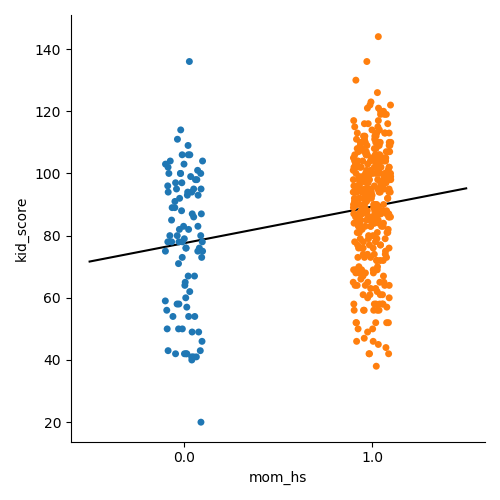

In [9]:
y = kid_score  # define dependent variable
Xa = sm.add_constant(mom_hs)  # add ones vector
model = sm.OLS(y, Xa)  # define model
res_OLS = model.fit()
params = res_OLS.params
print("Linear model, intercept: %.2f, slope: %.2f" %(params[0], params[1]))
# plot data jittering independent binary variable
sns.catplot(data=data_df, x='mom_hs', y='kid_score', kind='strip')
# get extreme x-axis points to plot the regression line
xx = np.array(plt.xlim())
# plot regression line
plt.plot(xx, params.const+xx*params.mom_hs, color='k');

### Continuous predictor

Linear model, intercept: 25.80, slope: 0.61


<IPython.core.display.Javascript object>


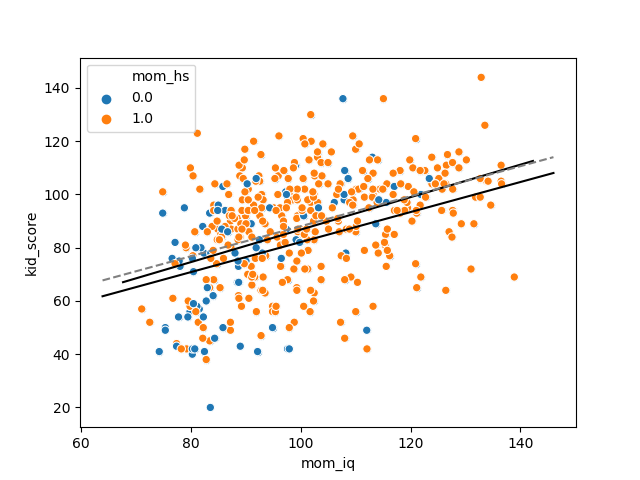

In [10]:
Xa = sm.add_constant(data_df.mom_iq)  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
print("Linear model, intercept: %.2f, slope: %.2f" %(params[0], params[1]))
# plot data
plt.figure()
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score')
# get extreme x-axis points to plot the regression line
xx = np.array(plt.xlim())
# plot regression line
plt.plot(xx, params.const+xx*params[1], color='k')

## Multiple predictors

In [11]:
Xa = sm.add_constant(data_df[['mom_hs', 'mom_iq']])  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
print("Linear model, intercept: %.2f, slope of mom_hs: %.2f, slope of mom_iq: %.2f" %(params[0], params[1], params[2]))
# plot data with color coding the binary independent variable
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs')
# get extreme x-axis points to plot the regression line
xx = np.array(plt.xlim())
# plot regression line for mom_hs=0
plt.plot(xx, params.const+xx*params.mom_iq, color='k');
# plot regression line for mom_hs=1
plt.plot(xx, params.const+xx*params.mom_iq+params.mom_hs, color='grey', linestyle='--');

Linear model, intercept: 25.73, slope of mom_hs: 5.95, slope of mom_iq: 0.56


# Adding interactions

In [13]:
# Adding interactions: mom_hs*mom_iq
# add a column in the dataframe for the new interaction
data_df['hs_iq'] = data_df['mom_hs']*data_df['mom_iq'] 

# add constant (ones vector)
Xa = sm.add_constant(data_df[['mom_hs', 'mom_iq','hs_iq']])  

# linear regression +  parameters of the model
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
print(data_df)


     kid_score  mom_hs      mom_iq  mom_work  mom_age       hs_iq
0           65     1.0  121.117529         4       27  121.117529
1           98     1.0   89.361882         4       25   89.361882
2           85     1.0  115.443165         4       27  115.443165
3           83     1.0   99.449639         3       25   99.449639
4          115     1.0   92.745710         4       27   92.745710
..         ...     ...         ...       ...      ...         ...
429         94     0.0   84.877412         4       21    0.000000
430         76     1.0   92.990392         4       23   92.990392
431         50     0.0   94.859708         2       24    0.000000
432         88     1.0   96.856624         2       21   96.856624
433         70     1.0   91.253336         2       25   91.253336

[434 rows x 6 columns]


<IPython.core.display.Javascript object>


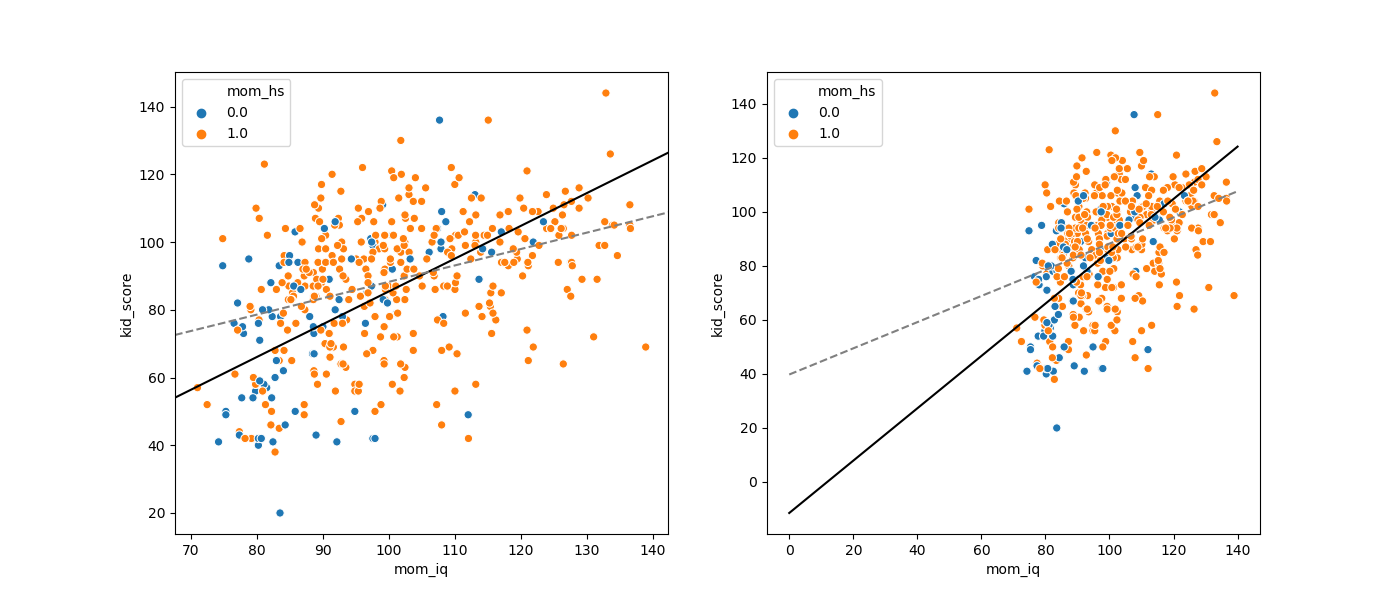

In [18]:
# figure 3.4 Regression lines of child's test score on mother's IQ for children whose mothers completed high school or not. 
# Left, not centered to intercept, Right, centered. 

#Create figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#LEFT
# plot data with color coding the binary independent variable
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs', ax = axes[0])

# get extreme x-axis points to plot the regression line
xx = np.array(axes[0].set_xlim())

# plot regression line for mom_hs=0
axes[0].plot(xx, params.const+xx*params.mom_iq, color='k');

# plot regression line for mom_hs=1 and interaction
intercept = params.const+params.mom_hs
coef_beta = params.mom_iq+params.hs_iq
axes[0].plot(xx, intercept+xx*coef_beta, color='grey', linestyle='--');

#RIGHT
# intercept scale
xx = np.array([0, 140])
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs', ax = axes[1])

# plot regression line for mom_hs=0
axes[1].plot(xx, params.const+xx*params.mom_iq, color='k');

# plot regression line for mom_hs=1 and interaction 
axes[1].plot(xx, params.const+xx*params.mom_iq+params.mom_hs+xx*params.hs_iq, color='grey', linestyle='--');

In [19]:
data_df

kid_score  mom_hs      mom_iq  mom_work  mom_age       hs_iq
0           65     1.0  121.117529         4       27  121.117529
1           98     1.0   89.361882         4       25   89.361882
2           85     1.0  115.443165         4       27  115.443165
3           83     1.0   99.449639         3       25   99.449639
4          115     1.0   92.745710         4       27   92.745710
..         ...     ...         ...       ...      ...         ...
429         94     0.0   84.877412         4       21    0.000000
430         76     1.0   92.990392         4       23   92.990392
431         50     0.0   94.859708         2       24    0.000000
432         88     1.0   96.856624         2       21   96.856624
433         70     1.0   91.253336         2       25   91.253336

[434 rows x 6 columns]

## Visualize uncertainty in the fitted regression

Linear model, intercept: 25.80, slope: 0.61


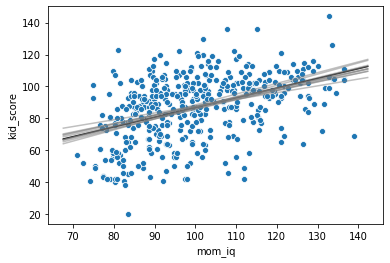

In [10]:
Xa = sm.add_constant(data_df.mom_iq)  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
n_sim = 10
betas_sim = sim(res_OLS, size=n_sim)
print("Linear model, intercept: %.2f, slope: %.2f" %(params[0], params[1]))
# plot data
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score')
# get extreme x-axis points to plot the regression line
xx = np.array(plt.xlim())
# plot regression line
plt.plot(xx, params.const+xx*params[1], color='k');
for i in range(n_sim):
    plt.plot(xx, betas_sim[i, 0]+xx*betas_sim[i, 1], color='grey', alpha=0.5)

Average mom_hs: 0.785714
Average mom_iq: 100.000000


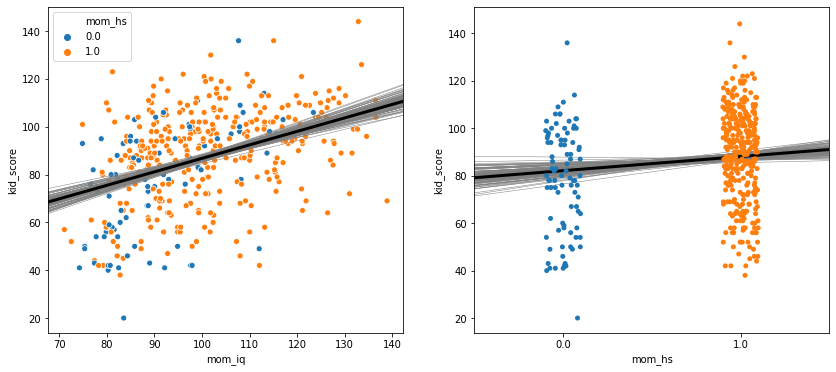

In [11]:
# Is the intercept meaningless? We are far from the range of the real data.
Xa = sm.add_constant(data_df[['mom_hs', 'mom_iq']])  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize  = (14,6))
# plot data with color coding the binary independent variable
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs', ax = axes[0])
# get extreme x-axis points to plot the regression line
xx = np.array(axes[0].set_xlim())
# simulations
size = 100
beta_sim = sim(res_OLS, size)
for i in range(size):
    axes[0].plot(xx, beta_sim[i,0]+xx*beta_sim[i,2]+np.mean(data_df.mom_hs)*beta_sim[i,1], color='gray', linewidth = 0.5);
# plot regression line for average mom_hs
axes[0].plot(xx, params.const+(xx*params.mom_iq)+(np.mean(data_df.mom_hs)*params.mom_hs), color='k', linewidth = 3)

# plot data jittering independent binary variable
sns.stripplot(data=data_df, x='mom_hs', y='kid_score', ax = axes[1])
# get extreme x-axis points to plot the regression line
xx = np.array(axes[1].set_xlim())
for i in range(size):
    axes[1].plot(xx, beta_sim[i,0]+np.mean(data_df.mom_iq)*beta_sim[i,2]+xx*beta_sim[i,1], color='gray', linewidth = 0.5);

# plot regression line for average mom_iq
axes[1].plot(xx, params.const+np.mean(data_df.mom_iq)*params.mom_iq+xx*params.mom_hs, color='k', linewidth = 3)
print("Average mom_hs: %2f" %np.mean(data_df.mom_hs))
print("Average mom_iq: %2f" %np.mean(data_df.mom_iq))

# Residuals

Text(0.5, 1.0, 'Residuals regressed to maternal IQ')

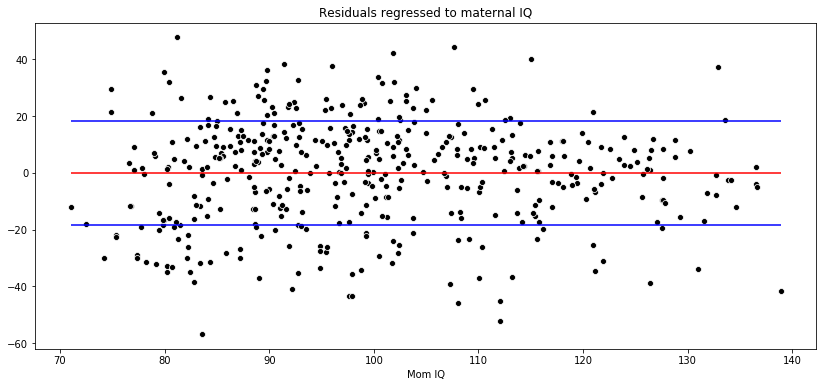

In [12]:
Xa = sm.add_constant(data_df[['mom_iq']])  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
fig, axes = plt.subplots(figsize = (14,6))
# scatter plot of residuals
rs = res_OLS.resid
sns.scatterplot(x = data_df.mom_iq,y = rs,ax = axes, color = 'k')
# mean and +- 1 std
xx = np.arange(0,len(rs),1)
axes.hlines(np.mean(rs),np.min(data_df.mom_iq),np.max(data_df.mom_iq),color = 'r')
axes.hlines(np.std(rs),np.min(data_df.mom_iq),np.max(data_df.mom_iq),color = 'b')
axes.hlines(-np.std(rs),np.min(data_df.mom_iq),np.max(data_df.mom_iq),color = 'b')
axes.set_xlabel('Mom IQ')
axes.set_title('Residuals regressed to maternal IQ')

# Prediction

A child with mom_hs = 1.0 and mom_iq = 100 has a predicted score of 88.07 points


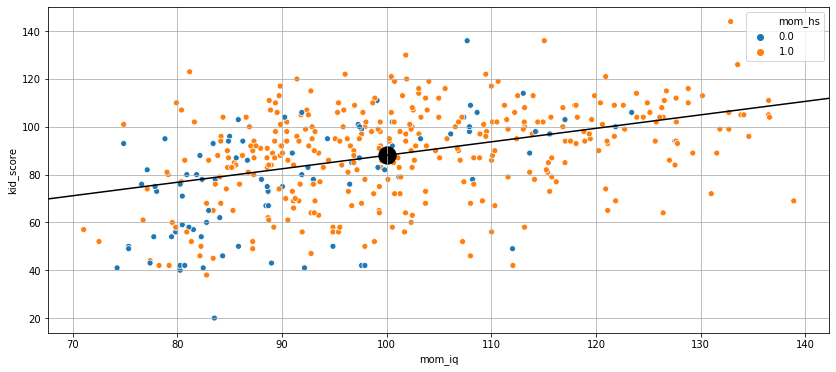

In [14]:
# Model no interaction
Xa = sm.add_constant(data_df[['mom_hs', 'mom_iq']])  # add ones vector
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params

# Prediction
# create new data frame for new data
df_pred = pd.DataFrame(data = [[1.0,100]], columns = ['mom_hs','mom_iq'])

# predict from regression model 
X_pred = sm.add_constant(df_pred[['mom_hs', 'mom_iq']], has_constant = 'add')  # add ones vector
y_pred = res_OLS.predict(X_pred)
print("A child with mom_hs = 1.0 and mom_iq = 100 has a predicted score of %.2f points" %(y_pred))

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize  = (14,6))
# plot data with color coding the binary independent variable
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs', ax = axes)
# get extreme x-axis points to plot the regression line
xx = np.array(axes.set_xlim())
# plot regression line for mom_hs=1
axes.plot(xx, params.const+xx*params.mom_iq+params.mom_hs, color='k');
axes.scatter(100, y_pred[0], s = 300, color = 'k')
axes.grid()

A child with mom_hs = 1.0 and mom_iq = 100 has a predicted score of 88.25 points


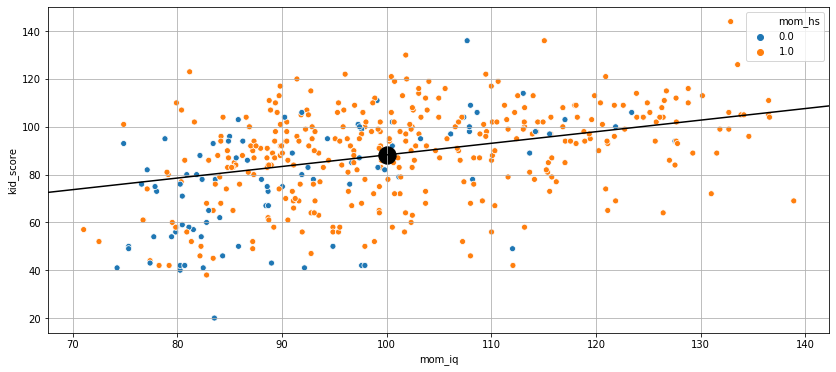

In [15]:
# Model with interaction 
Xa = sm.add_constant(data_df[['mom_hs', 'mom_iq','hs_iq']])  
# linear regression +  parameters of the model
model = sm.OLS(y, Xa)
res_OLS = model.fit()
params = res_OLS.params
# Prediction
# create new data frame for new data
df_pred = pd.DataFrame(data = [[1.0,100,100*1.0]], columns = ['mom_hs','mom_iq','hs_iq'])
# predict from regression model 
X_pred = sm.add_constant(df_pred[['mom_hs', 'mom_iq', 'hs_iq']], has_constant = 'add')  # add ones vector
y_pred = res_OLS.predict(X_pred)
print("A child with mom_hs = 1.0 and mom_iq = 100 has a predicted score of %.2f points" %(y_pred))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize  = (14,6))
# plot data with color coding the binary independent variable
sns.scatterplot(data=data_df, x='mom_iq', y='kid_score', hue='mom_hs', ax = axes)
# get extreme x-axis points to plot the regression line
xx = np.array(axes.set_xlim())
# plot regression line for mom_hs=1
axes.plot(xx, params.const+xx*params.mom_iq+params.mom_hs+xx*params.hs_iq, color='k')
axes.scatter(100, y_pred[0], s = 300, color = 'k')
axes.grid()

## Exercise 2.1

In [9]:
data_folder = 'data/pyth/'
data_df = pd.read_csv(data_folder + 'exercise2.1.dat', 
                 sep=" ")

In [23]:
train_data = data_df.iloc[:39, :]
Xa = sm.add_constant(train_data[['x1', 'x2']])  # add ones vector
model = sm.OLS(train_data.y, Xa)
res_OLS = model.fit()
params = res_OLS.params
print("Linear model, intercept: %.2f, slope of x1: %.2f, slope of x2: %.2f" %(params[0], params[1], params[2]))
res_OLS.summary()

Linear model, intercept: 1.35, slope of x1: 0.51, slope of x2: 0.81


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     613.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.54e-28
Time:                        17:30:52   Log-Likelihood:                -50.151
No. Observations:                  39   AIC:                             106.3
Df Residuals:                      36   BIC:                             111.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3498      0.408      3.311      0.002       0.523       2.177
x1             0.5115      0.048     10.730      0.000       0.415       0.608
x2             0.8061      0.025     32.545      0.000       0.756       0.856
==============================================================================
Omnibus:                       13.479   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.806
Skew:                           1.301   Prob(JB):                      0.00100
Kurtosis:                       4.312   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# plot data with color coding the binary independent variable
fig, axs = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=train_data, x='x1', y='y', ax=axs[0])
sns.scatterplot(data=train_data, x='x2', y='y', ax=axs[1])
# get extreme x-axis points to plot the regression line
xx = np.array(axs[0].get_xlim())
# plot regression line for mom_hs=0
axs[0].plot(xx, params.const+train_data.x2.mean()*params.x2+xx*params.x1, color='k');
# get extreme x-axis points to plot the regression line
xx = np.array(axs[1].get_xlim())
# plot regression line for mom_hs=1
axs[1].plot(xx, params.const+train_data.x1.mean()*params.x1+xx*params.x2, color='k', linestyle='--')
plt.tight_layout()

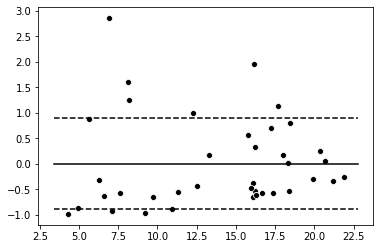

In [35]:
# scatter plot of residuals
rs = res_OLS.resid
pred_train = res_OLS.predict(Xa)
sns.scatterplot(x=pred_train, y=rs, color = 'k')
# mean and +- 1 std
xx = plt.xlim()
plt.plot(xx, [rs.mean(), rs.mean()], 'k')
plt.plot(xx, [rs.mean()-rs.std(), rs.mean()-rs.std()], 'k--')
plt.plot(xx, [rs.mean()+rs.std(), rs.mean()+rs.std()], 'k--');

In [43]:
test_data = data_df.iloc[40:, :]
g = sns.jointplot(x="x1", y="x2", data=train_data, kind="kde");
g.x = test_data.x1
g.y = test_data.x2
g.plot_joint(plt.scatter, marker='+', c='r', s=50, label='test_data')
plt.legend();

In [68]:
Xtest = sm.add_constant(test_data[['x1', 'x2']])  # add ones vector
pred_test = res_OLS.predict(Xtest)
sigma_hat = np.sqrt(np.sum(res_OLS.resid**2) / res_OLS.df_resid)
plt.figure()
plt.errorbar(Xtest.iloc[:, 1], pred_test, 2*sigma_hat, fmt='s', markersize=10)
plt.xlabel('x1')
plt.ylabel('predicted y')

Text(0, 0.5, 'predicted y')

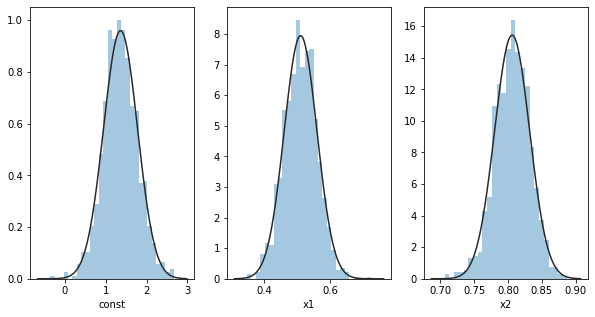

In [105]:
from scipy.stats import norm
sim_betas = sim(res_OLS, size=1000)
n_betas = sim_betas.shape[1]
fig, axs = plt.subplots(ncols=n_betas, figsize=[10, 5])
for i in range(n_betas):
    sns.distplot(sim_betas[:, i], fit=norm, kde=False, ax=axs[i], axlabel=res_OLS.params.keys()[i]);

## Exercise 2.3

In [ ]:
var1 = np.random.normal(loc=0., scale=1., size=1000)

In [ ]:
for i in range(100):
    var1 = np.random.normal(loc=0., scale=1., size=1000)
    # you can write the rest of your code

## Exercise 2.5

In [3]:
data_folder = 'data/beauty/'
data_df = pd.read_csv(data_folder + 'ProfEvaltnsBeautyPublic.csv')

In [12]:
subset_data = data_df[['btystdave', 'age', 'female']]
dep_var = data_df['courseevaluation']
Xa = sm.add_constant(subset_data)  # add ones vector
model = sm.OLS(dep_var, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     11.18
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.30e-07
Time:                        10:59:07   Log-Likelihood:                -367.42
No. Observations:                 463   AIC:                             742.8
Df Residuals:                     459   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2252      0.143     29.584      0.000       3.945       4.506
btystdave      0.1400      0.033      4.211      0.000       0.075       0.205
age           -0.0026      0.003     -0.940      0.348      -0.008       0.003
female        -0.2108      0.053     -3.990      0.000      -0.315      -0.107
==============================================================================
Omnibus:                       16.120   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.282
Skew:                          -0.470   Prob(JB):                     0.000177
Kurtosis:                       2.889   Cond. No.                         286.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
subset_data = data_df[['btystdave', 'age', 'female']]
subset_data['agefem'] = subset_data['age'] * subset_data['female']
dep_var = data_df['courseevaluation']
Xa = sm.add_constant(subset_data)  # add ones vector
model = sm.OLS(dep_var, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

/home/andrea/anaconda3/envs/mamba/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.586
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.89e-07
Time:                        11:02:44   Log-Likelihood:                -365.14
No. Observations:                 463   AIC:                             740.3
Df Residuals:                     458   BIC:                             761.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0140      0.173     23.156      0.000       3.673       4.355
btystdave      0.1423      0.033      4.295      0.000       0.077       0.207
age            0.0016      0.003      0.464      0.643      -0.005       0.008
female         0.3483      0.267      1.303      0.193      -0.177       0.874
agefem        -0.0119      0.006     -2.133      0.033      -0.023      -0.001
==============================================================================
Omnibus:                       16.069   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.164
Skew:                          -0.471   Prob(JB):                     0.000187
Kurtosis:                       2.962   Cond. No.                         630.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
subset_data = data_df[['btystdave', 'age', 'tenured', 'female',
                      'formal', 'nonenglish', 'multipleclass', 'onecredit',
                      'profevaluation', 'tenuretrack', 'fulldept']]
dep_var = data_df['courseevaluation']
Xa = sm.add_constant(subset_data)  # add ones vector
model = sm.OLS(dep_var, Xa)
res_OLS = model.fit()
params = res_OLS.params
res_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     309.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.40e-202
Time:                        10:56:41   Log-Likelihood:                 112.95
No. Observations:                 463   AIC:                            -201.9
Df Residuals:                     451   BIC:                            -152.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0227      0.107     -0.213      0.832      -0.233       0.187
btystdave          0.0286      0.013      2.271      0.024       0.004       0.053
age                0.0027      0.001      2.268      0.024       0.000       0.005
tenured            0.0054      0.028      0.193      0.847      -0.050       0.061
female            -0.0199      0.020     -1.009      0.313      -0.059       0.019
formal             0.0095      0.027      0.355      0.723      -0.043       0.062
nonenglish        -0.0977      0.040     -2.419      0.016      -0.177      -0.018
multipleclass     -0.0230      0.020     -1.165      0.245      -0.062       0.016
onecredit          0.1107      0.042      2.650      0.008       0.029       0.193
profevaluation     0.9293      0.018     52.021      0.000       0.894       0.964
tenuretrack       -0.0148      0.031     -0.470      0.638      -0.077       0.047
fulldept           0.0385      0.031      1.225      0.221      -0.023       0.100
==============================================================================
Omnibus:                       83.431   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.116
Skew:                          -0.867   Prob(JB):                     1.07e-50
Kurtosis:                       5.987   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""